In [1]:
from sklearn.impute import KNNImputer
from convertcsv.get_all_metrics_with_tags import get_all_metrics_with_tags
from visualization import graphs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from convertcsv.import_preprocess_v4 import readcsvs

In [5]:
#What should we do here?

#Set up many different pipelines to compare.

#The things to vary, in order of significance/importance
"""
NaN treshold

KNN imptutation neigbours. Do research on this?
KNN weighting and distance metric
These can be researched separately by eliminating NaNs from a dataset, then using 
creating a loss function for the results of various types of KNN. Seems like a no brainer tbh.
How to do this? Simply removing all NaNs don't work. Use a similar, smaller data set.
Take a random subset of the thingies. Then clean it so there is no NaNs at all. Then 
set a random amount in random places to be NaNs. Aim for 25% perhaps
Actually first one has to remove those over the treshold, then look at the finished 
percentage. Emulate that. Write latex simultaneously
0+c 
"""
file_list, y = get_all_metrics_with_tags(r"F:\Master\Kubernetes\sockshop\microservices-demo\query\automated\generated_csvs_4")
initial_readings = readcsvs(file_list, reduce_NaNs_treshold=False, remove_unique_cols=True, remove_monotonic_increasing=True)
initial_readings



go_gc_duration_seconds&payment:80&payment&0.25  \
instances timepoints                                                            
0         2023-03-24 14:09:48                                        0.000307   
          2023-03-24 14:09:53                                        0.000307   
          2023-03-24 14:09:58                                        0.000307   
          2023-03-24 14:10:03                                        0.000307   
          2023-03-24 14:10:08                                        0.000307   
...                                                                       ...   
75        2023-03-29 16:21:34                                        0.000318   
          2023-03-29 16:21:39                                        0.000318   
          2023-03-29 16:21:44                                        0.000318   
          2023-03-29 16:21:49                                        0.000318   
          2023-03-29 16:21:54                                        0.000318   

                               go_gc_duration_seconds&payment:80&payment&0.75  \
instances timepoints                                                            
0         2023-03-24 14:09:48                                        0.000333   
          2023-03-24 14:09:53                                        0.000333   
          2023-03-24 14:09:58                                        0.000333   
          2023-03-24 14:10:03                                        0.000333   
          2023-03-24 14:10:08                                        0.000333   
...                                                                       ...   
75        2023-03-29 16:21:34                                        0.000370   
          2023-03-29 16:21:39                                        0.000370   
          2023-03-29 16:21:44                                        0.000370   
          2023-03-29 16:21:49                                        0.000370   
          2023-03-29 16:21:54                                        0.000370   

                               go_gc_duration_seconds&user:80&user&0.25  \
instances timepoints                                                      
0         2023-03-24 14:09:48                                  0.000321   
          2023-03-24 14:09:53                                  0.000321   
          2023-03-24 14:09:58                                  0.000321   
          2023-03-24 14:10:03                                  0.000321   
          2023-03-24 14:10:08                                  0.000321   
...                                                                 ...   
75        2023-03-29 16:21:34                                  0.000380   
          2023-03-29 16:21:39                                  0.000380   
          2023-03-29 16:21:44                                  0.000380   
          2023-03-29 16:21:49                                  0.000380   
          2023-03-29 16:21:54                                  0.000380   

                               go_gc_duration_seconds&user:80&user&0.5  \
instances timepoints                                                     
0         2023-03-24 14:09:48                                 0.000333   
          2023-03-24 14:09:53                                 0.000333   
          2023-03-24 14:09:58                                 0.000333   
          2023-03-24 14:10:03                                 0.000333   
          2023-03-24 14:10:08                                 0.000333   
...                                                                ...   
75        2023-03-29 16:21:34                                 0.000451   
          2023-03-29 16:21:39                                 0.000451   
          2023-03-29 16:21:44                                 0.000451   
          2023-03-29 16:21:49                                 0.000451   
          2023-03-29 16:21:54                              

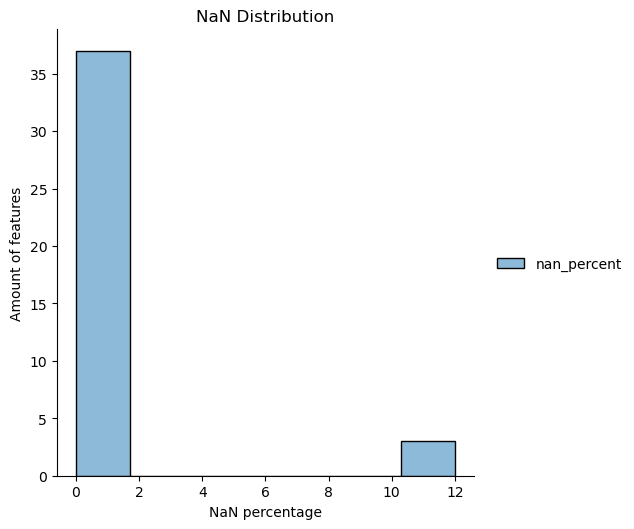

Total NaN percent: 0.8994341308448327


In [6]:
nan_percents = graphs.get_nan_percents(initial_readings)
total_average_nans = nan_percents["nan_percent"].sum() / len(nan_percents)
sns.displot(data=nan_percents)
plt.xlabel("NaN percentage")
plt.ylabel("Amount of features")
plt.title("NaN Distribution")
plt.show()
print("Total NaN percent:", total_average_nans)

In [7]:
#KNN imputation testing
#First, create completely clean version of the dataset:
clean_df = initial_readings.dropna(axis=1, how='any')
clean_df_check = graphs.get_nan_percents(clean_df)
print(clean_df_check["nan_percent"].sum())

0.0


In [10]:
#Make copy of the clean_df that has random NaN values.
def add_random_nans(df:pd.DataFrame, percent:float):
    #Find the amount of nans to add
    nans_amount = int(df.size * percent)

    #Randomly generate indices to replace with NaNs
    random_indices = np.random.choice(df.size, nans_amount, replace=False)
    row_i, col_i = np.unravel_index(random_indices, df.shape)

    #make sure not to mess with the original
    bad_df = df.copy()
    bad_df.values[row_i, col_i] = np.nan

    return bad_df

incomplete_df = add_random_nans(clean_df, 0.01)
incomplete_df_check = graphs.get_nan_percents(incomplete_df)
total_average_nans = incomplete_df_check["nan_percent"].sum() / len(incomplete_df_check)
print(total_average_nans)



0.9999973168840439


In [11]:
#Compare KNN methods
#First: rule of thumb by square root of the number of samples
square_root_k = int(np.sqrt(incomplete_df.size))
sqrt_imputer = KNNImputer(n_neighbors=square_root_k)
sqrt_imputed = sqrt_imputer.fit_transform(incomplete_df)
r2_score(clean_df.values, sqrt_imputed)


0.9951635961313731

In [12]:
def compareImputations(clean_df, imputers, iterations=5, nanpercent=0.05):
    highest_score = 0
    best_k = ""
    for imputer_and_name in imputers:
        name = imputer_and_name[0]
        imputer = imputer_and_name[1]
        scores = []
        for i in range(iterations):
            nan_values = add_random_nans(clean_df, nanpercent)
            imputed_dataset = imputer.fit_transform(nan_values)
            score = r2_score(clean_df.values, imputed_dataset)
            scores.append(score)
            print("{}, round {}: R2 score: {}".format(name, i, score))
        mean = np.mean(scores)

        if mean > highest_score:
            highest_score = mean
            best_k = name
        print("{}, mean score: {}".format(name, mean))
    print("Best performing k: {} with a score of {}".format(best_k, highest_score))
        

In [ ]:
sqrt_imputer = KNNImputer(n_neighbors=int(np.sqrt(incomplete_df.size)))
five_imputer = KNNImputer(n_neighbors=5)
fifty_imputer = KNNImputer(n_neighbors=50)
hundred_imputer = KNNImputer(n_neighbors=100)
compareImputations(clean_df, [("Square root",sqrt_imputer),("k=5",five_imputer),("k=50",fifty_imputer),("k=100",hundred_imputer)],nanpercent=0.01)

Square root, round 0: R2 score: 0.9948370013838457
Square root, round 1: R2 score: 0.9955418436956468
Square root, round 2: R2 score: 0.9934963532666269
Square root, round 3: R2 score: 0.9949715143134165
Square root, round 4: R2 score: 0.9943718334507026
Square root, mean score: 0.9946437092220476
k=5, round 0: R2 score: 0.9997266007227921
k=5, round 1: R2 score: 0.9997859005420574
k=5, round 2: R2 score: 0.9996989811549436
k=5, round 3: R2 score: 0.999820381549287
k=5, round 4: R2 score: 0.9997867237472919
k=5, mean score: 0.9997637175432743
k=50, round 0: R2 score: 0.9976469549956516
k=50, round 1: R2 score: 0.9973270039514751
k=50, round 2: R2 score: 0.9975295494474276
k=50, round 3: R2 score: 0.9974396639071511
k=50, round 4: R2 score: 0.996754007219985
k=50, mean score: 0.997339435904338
k=100, round 0: R2 score: 0.9966953075744062
k=100, round 1: R2 score: 0.9964340606923556
k=100, round 2: R2 score: 0.9938040093682317
k=100, round 3: R2 score: 0.9953295307446292
k=100, round 4: 

In [13]:
#Because higher K meant consistently higher scores, let's check 1-9 as well
compareImputations(clean_df,[("k=1",KNNImputer(n_neighbors=1)),("k=2",KNNImputer(n_neighbors=2)),("k=3",KNNImputer(n_neighbors=3)),("k=4", KNNImputer(n_neighbors=4)),("k=5",KNNImputer(n_neighbors=5)),("k=6",KNNImputer(n_neighbors=6)),("k=7",KNNImputer(n_neighbors=7)),("k=8",KNNImputer(n_neighbors=8)),("k=9",KNNImputer(n_neighbors=9),("k=10",KNNImputer(n_neighbors=10)))], nanpercent=0.01)

k=1, round 0: R2 score: 0.9999396668176938
k=1, round 1: R2 score: 0.999914809357239
k=1, round 2: R2 score: 0.9999532528694838
k=1, round 3: R2 score: 0.9998947125728723
k=1, round 4: R2 score: 0.9999744707558662
k=1, mean score: 0.999935382474631
k=2, round 0: R2 score: 0.9999330768470702
k=2, round 1: R2 score: 0.9999106267918594
k=2, round 2: R2 score: 0.9998936193141217
k=2, round 3: R2 score: 0.999937864428956
k=2, round 4: R2 score: 0.9999242934000653
k=2, mean score: 0.9999198961564145
k=3, round 0: R2 score: 0.9998709098816884
k=3, round 1: R2 score: 0.9999052508287367
k=3, round 2: R2 score: 0.9998735588270836
k=3, round 3: R2 score: 0.9999431211150718
k=3, round 4: R2 score: 0.9998950287841059
k=3, mean score: 0.9998975738873372
k=4, round 0: R2 score: 0.9997873286136116
k=4, round 1: R2 score: 0.9999144754115724
k=4, round 2: R2 score: 0.999917413408312
k=4, round 3: R2 score: 0.9998611869600179
k=4, round 4: R2 score: 0.9998413235142594
k=4, mean score: 0.9998643455815547


In [1]:
print("test")

test
